# Lesson 14 Activity: Advanced Statistics

## Learning Objectives

This activity will help you to:

1. Apply appropriate statistical tests to real-world data
2. Interpret hypothesis test results and p-values
3. Compare multiple groups using statistical methods
4. Make data-driven conclusions based on statistical evidence

## Setup

Import the required libraries and load the weather dataset.

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

In [3]:
# Load the weather dataset
url = 'https://gperdrizet.github.io/FSA_devops/assets/data/unit2/weather.csv'
df = pd.read_csv(url)
df.head()

,weather_condition,wind_strength,temperature_c,rainfall_inches,humidity_percent,pressure_hpa
0,Sunny,Light Breeze,8.2,0.13,48.8,1016.5
1,Snowy,Gale,1.6,0.29,89.6,1009.4
2,Rainy,Strong Wind,7.3,0.01,100.0,1003.3
3,Cloudy,Light Breeze,21.6,0.62,49.3,1006.9
4,Sunny,Calm,12.0,1.09,38.6,1016.0


## Exercise 1: Humidity Differences Among Weather Conditions

**Objective**: Determine if humidity is significantly different among different weather conditions.

**Background**: 
The weather dataset contains humidity measurements for different weather conditions (Sunny, Rainy, Cloudy, etc.). We want to know if these weather conditions are associated with significantly different humidity levels.

**Tasks**:

1. **Explore the data**:
   - Check how many unique weather conditions are in the dataset
   - Calculate the mean and standard deviation of humidity for each weather condition
   - Create a boxplot showing the humidity distribution for each weather condition
   - Based on the visualization, do you think the humidity levels differ significantly?

2. **Choose an appropriate statistical test**:
   - Since we're comparing humidity across multiple groups (weather conditions), what test should we use?
   - Hint: Consider ANOVA (Analysis of Variance) or Kruskal-Wallis test
   - State your null and alternative hypotheses

3. **Check assumptions** (if using ANOVA):
   - Are the sample sizes roughly equal across groups?
   - Use a visualization or test to check if the data appears roughly normally distributed
   - Check for equal variances across groups (you can use a simple visual check or Levene's test)

4. **Perform the statistical test**:
   - Conduct the chosen test using scipy.stats
   - Report the test statistic and p-value
   - Using α = 0.05, determine whether to reject or accept the null hypothesis

5. **Interpret the results**:
   - What does your test result tell you about humidity and weather conditions?
   - If you rejected the null hypothesis, which weather conditions appear to have different humidity levels? (Use the boxplot and descriptive statistics to support your conclusion)
   - What are the practical implications of this finding?

**Bonus**: 
- If you found a significant difference, perform post-hoc pairwise comparisons to determine which specific weather conditions differ from each other
- Consider whether Bonferroni correction should be applied to the pairwise comparisons

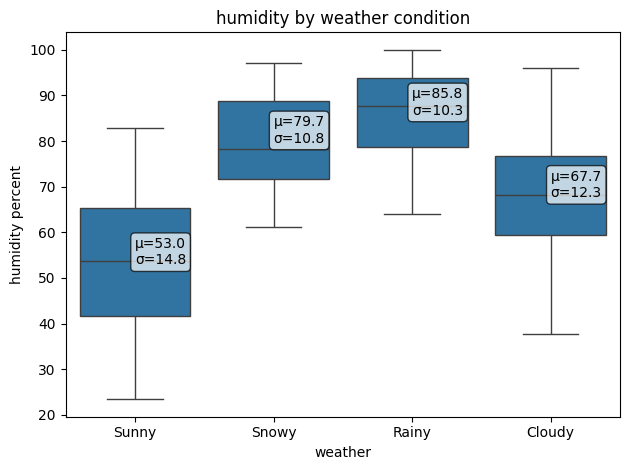

In [ ]:
#boxplot
#tukey_hsd
plt.title('humidity by weather condition')
ax = sns.boxplot(df, x='weather_condition', y='humidity_percent')
plt.xlabel('weather')
plt.ylabel('humidity percent')


weather_groups = df.groupby(['weather_condition'])

for weather_condition, column_data in weather_groups:

    mean_val = column_data['humidity_percent'].mean()
    std_val = column_data['humidity_percent'].std()

    x_pos = list(df['weather_condition'].unique()).index(*weather_condition)

    ax.text(
        x_pos,
        mean_val,
        f"μ={mean_val:.1f}\nσ={std_val:.1f}",
        bbox=dict(boxstyle="round", facecolor="white", alpha=0.7)
    )

plt.tight_layout()
plt.show()

Humidity Levels per weather condition do vary a good amount, although rainy and snowy seem to be very similar and could likely be considered the same. 

As mentioned above looking at the data from our boxplot, we can make a null hypothesis of snowy and rainy having the same humidity. Our alternate Hypothesis would be they are different. Let's use the statistical test ANOVA to gain more confidence in the null hypothesis. 

ANOVA Test
1. Null = Rainy and Snowy are of same humidity
2. Alternate = Rainy and Snowy are different humidities

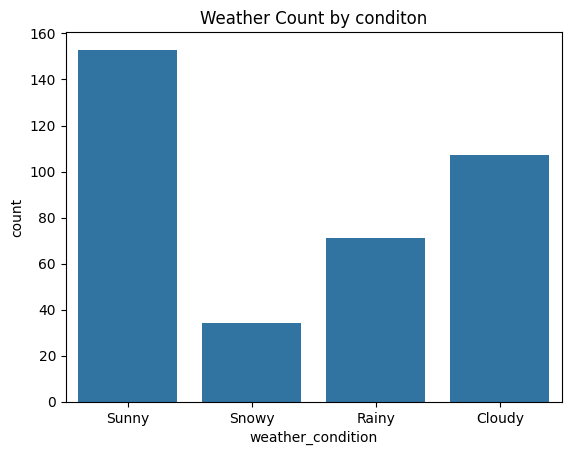

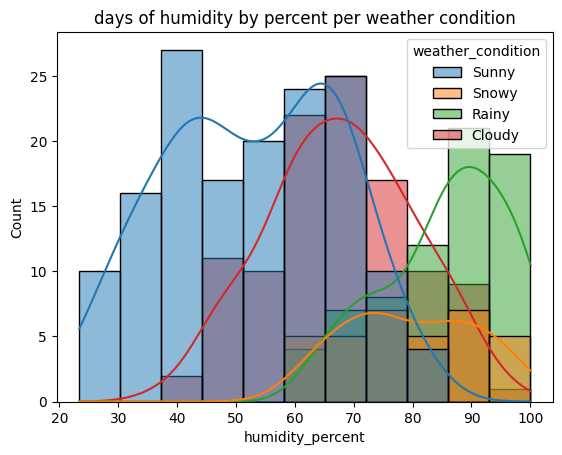

In [60]:
# Checking samples
plt.title('Weather Count by conditon')
sns.countplot(x=df['weather_condition'])
plt.show()

plt.title('days of humidity by percent per weather condition')
sns.histplot(x=df['humidity_percent'], kde=True, hue=df['weather_condition'])
plt.show()

1. Getting more samples and large data sets for snowy and rainy could help with the confidence of this Null Hypothesis. Their counts by comparison to the others are a lot lower. 
2. A quick look at the weather conditions and their humidity, cloudy, snowy and sunny could very well be of normal distribution within their tail ranges. As for rainy, it looks slightly left skewed? This could be due to the smaller dataset and getting more values would make this more confident.

In [ ]:
f_state, p_value = stats.f_oneway(df)

## Exercise 2: Testing for Association Between Weather Condition and Wind Strength

**Objective**: Determine if there is a significant association (non-random relationship) between weather condition and wind strength.

**Background**: 
If weather conditions and wind strength are independent, we would expect days to be randomly distributed across all combinations of weather condition and wind strength. However, certain weather conditions might be more likely to occur with certain wind strengths (e.g., rainy days might be associated with stronger winds). We can use a chi-square test of independence to test this.

**Tasks**:

1. **Explore the data**:
   - Check the unique values in both `weather_condition` and `wind_strength` columns
   - Count how many days fall into each category for both variables
   - Create a contingency table (crosstab) showing the count of days for each combination of weather condition and wind strength
   - Use `pd.crosstab(df['weather_condition'], df['wind_strength'])` to create this table

2. **Visualize the relationship**:
   - Create a heatmap of the contingency table to visualize the distribution of days
   - You can use `plt.imshow()` or `sns.heatmap()` if seaborn is available
   - Based on the visualization, do certain weather conditions appear to be associated with certain wind strengths?

3. **State your hypotheses**:
   - **Null hypothesis**: Weather condition and wind strength are independent (days are randomly distributed across combinations)
   - **Alternative hypothesis**: Weather condition and wind strength are associated (days are NOT randomly distributed)

4. **Perform a chi-square test of independence**:
   - Use `scipy.stats.chi2_contingency()` on your contingency table
   - This test compares the observed frequencies to expected frequencies if the variables were independent
   - Report the chi-square statistic, p-value, and degrees of freedom

5. **Interpret the results**:
   - Using α = 0.05, determine whether to reject or accept the null hypothesis
   - If you reject the null hypothesis, what does this mean in practical terms?

6. **Draw conclusions**: Are weather condition and wind strength independent or associated?

In [ ]:
# Your code here

## Exercise 3: Testing for Relationship Between Humidity and Pressure

**Objective**: Determine if there is a significant linear relationship between humidity (%) and atmospheric pressure (hPa).

**Background**: 
When working with two continuous variables, we can test whether they are correlated. Correlation measures the strength and direction of a linear relationship. In meteorology, understanding relationships between variables like humidity and pressure can help improve weather predictions.

**Tasks**:

1. **Explore the data**:
   - Check for any missing values in `humidity_percent` and `pressure_hpa`
   - Calculate basic descriptive statistics (mean, std, min, max) for both variables
   - Create a scatter plot of humidity vs. pressure
   - Based on the visualization, do you think there's a relationship? If so, is it positive or negative?

2. **Choose an appropriate correlation test**:
   - Since we have two continuous variables, we can use Pearson or Spearman correlation
   - Pearson correlation measures linear relationships and assumes normality
   - Spearman correlation measures monotonic relationships and is more robust
   - Check the distributions of both variables (histograms or Q-Q plots) to help decide
   - State your null and alternative hypotheses

3. **Perform the correlation test**:
   - Calculate both Pearson and Spearman correlation coefficients
   - Use `scipy.stats.pearsonr()` and `scipy.stats.spearmanr()`
   - Report the correlation coefficient (r) and p-value for each test
   - Using α = 0.05, determine whether the correlation is statistically significant

4. **Interpret the correlation coefficient**:
   - What is the direction of the relationship (positive or negative)?
   - What is the strength of the relationship? (Hint: |r| < 0.3 weak, 0.3-0.7 moderate, > 0.7 strong)
   - Calculate the coefficient of determination (r²) - what percentage of variance in one variable is explained by the other?

5. **Draw conclusions**:
   - Is there a statistically significant relationship between humidity and pressure?
   - Is the relationship strong enough to be practically useful?

In [ ]:
# Your code here